In [1]:
import pandas as pd

from preprocessing import *
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

import gc

In [2]:
train_df = pd.read_csv("data/train.csv", index_col="id")
test_df = pd.read_csv("data/test.csv", index_col="id")
orig_df = fetch_ucirepo(id=848)['data']['original']
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a


In [3]:
train_df.describe()

,cap-diameter,stem-height,stem-width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


In [4]:
train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 3116945 non-null  object 
 1   cap-diameter          3116941 non-null  float64
 2   cap-shape             3116905 non-null  object 
 3   cap-surface           2445922 non-null  object 
 4   cap-color             3116933 non-null  object 
 5   does-bruise-or-bleed  3116937 non-null  object 
 6   gill-attachment       2593009 non-null  object 
 7   gill-spacing          1858510 non-null  object 
 8   gill-color            3116888 non-null  object 
 9   stem-height           3116945 non-null  float64
 10  stem-width            3116945 non-null  float64
 11  stem-root             359922 non-null   object 
 12  stem-surface          1136084 non-null  object 
 13  stem-color            3116907 non-null  object 
 14  veil-type             159452 non-null  

In [5]:
na_cols = train_df.isna().sum().loc[lambda x : x > 0].sort_values(ascending=False).reset_index()
na_cols["perc_missing"] = na_cols[0] / len(train_df)
print(na_cols)
na_cols = None
gc.collect()

                   index        0  perc_missing
0              veil-type  2957493      0.948843
1      spore-print-color  2849682      0.914255
2              stem-root  2757023      0.884527
3             veil-color  2740947      0.879370
4           stem-surface  1980861      0.635514
5           gill-spacing  1258435      0.403740
6            cap-surface   671023      0.215282
7        gill-attachment   523936      0.168093
8              ring-type   128880      0.041348
9             gill-color       57      0.000018
10               habitat       45      0.000014
11             cap-shape       40      0.000013
12            stem-color       38      0.000012
13              has-ring       24      0.000008
14             cap-color       12      0.000004
15  does-bruise-or-bleed        8      0.000003
16          cap-diameter        4      0.000001


0

In [6]:
CONT_FEATS = [
    "cap-diameter",
    "stem-height",
    "stem-width"
]
CAT_FEATS = [c for c in train_df.columns if c not in CONT_FEATS]
RESPONSE_COL = "class"

train_df = convert_cols(train_df, CONT_FEATS, CAT_FEATS)
test_df = convert_cols(test_df, CONT_FEATS, CAT_FEATS)
orig_df = convert_cols(orig_df, CONT_FEATS, CAT_FEATS)

d:\Programming\Workspaces\Python3 Workspace\Misc Data Analysis\Kaggle Playground Competition\S4E8\preprocessing.py:17: UserWarning: 'class' not found in dataframe
  warnings.warn(f"'{c}' not found in dataframe")


In [7]:
train_df = null_all_non_original_categories(train_df, orig_df, CAT_FEATS)
test_df = null_all_non_original_categories(test_df, orig_df, CAT_FEATS)

d:\Programming\Workspaces\Python3 Workspace\Misc Data Analysis\Kaggle Playground Competition\S4E8\preprocessing.py:31: UserWarning: 'class' not found in dataframe
  warnings.warn(f"'{c}' not found in dataframe")


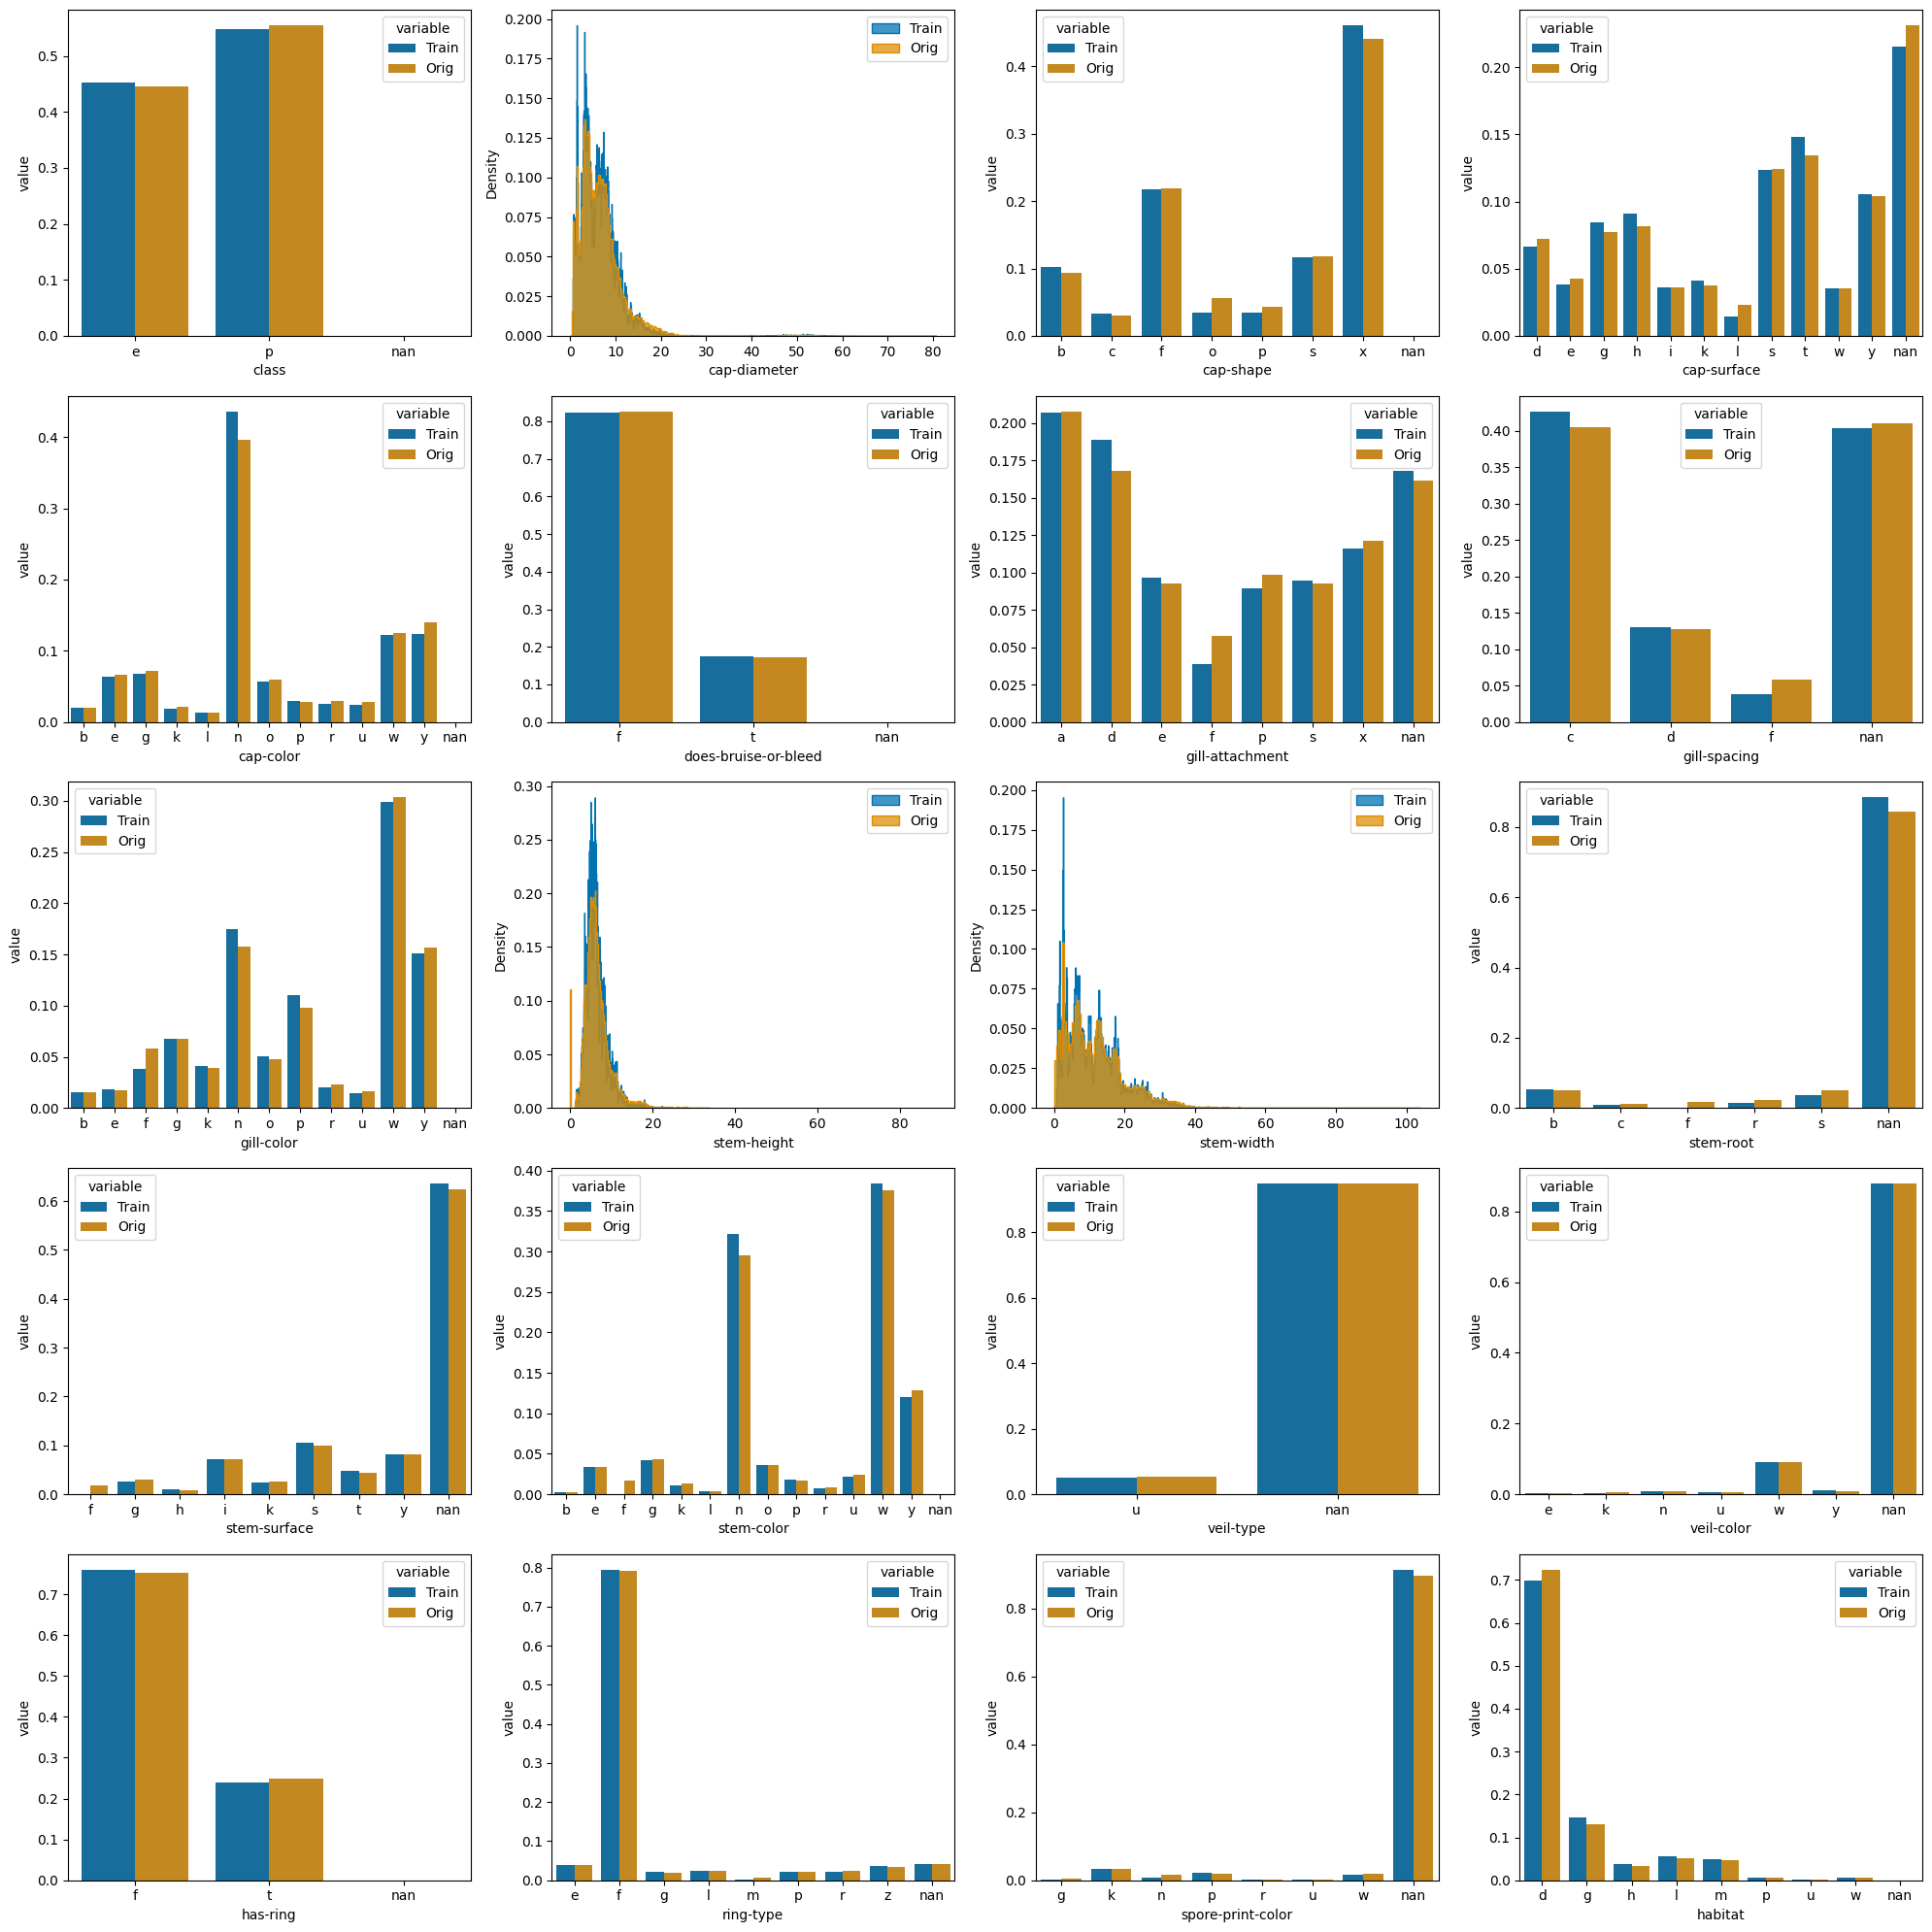

In [54]:
fig, axes = plt.subplots(5, 4, figsize=(20,20))

BLUE = (0.00392156862745098, 0.45098039215686275, 0.6980392156862745)
ORANGE = (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)

for col, ax in zip(train_df.columns, axes.flatten()):
    if col in CONT_FEATS:
        sns.histplot(train_df, x=col, element="step", stat="density", ax=ax, color=BLUE)
        sns.histplot(orig_df, x=col, element="step", stat="density", ax=ax, color=ORANGE)
        ax.legend(loc="upper right", labels=["Train", "Orig"])
    else:
        train_perc = train_df[col].value_counts(dropna=False) / len(train_df)
        orig_perc = orig_df[col].value_counts(dropna=False) / len(orig_df)
        combined = pd.concat([train_perc.rename("Train"), orig_perc.rename("Orig")], axis=1).reset_index()
        combined = combined.melt(id_vars=combined.columns[0])
        combined.iloc[:, 0] = combined.iloc[:, 0].cat.add_categories("nan").fillna("nan")
        sns.barplot(combined, x=combined.columns[0], y="value", hue="variable", ax=ax, palette="colorblind")

plt.tight_layout()
del col, ax, axes, train_perc, orig_perc, combined